#**Aprendizaje Automático** - 2023
# Clase 13: Redes neuronales convolucionales

*Trabajaron en esta notebook: Sofia Del Pozo, Diego Onna, Gastón Bujía*

Adaptado del curso de [Jean de Nyandwi](https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/8_deep_computer_vision_with_tensorflow/1_intro_to_computer_vision_and_cnn.ipynb)

## Contenido
* [1. Introducción a la visión artificial con redes neuronales convolucionales (CNN)](#1)
    * [¿Qué son las Redes Neuronales Convolucionales?](#1-1)
    * [Una arquitectura típica de redes neuronales convolucionales](#1-2)
        * [¿Qué es la convolución?](#1-3)
        * [Capas convolucionales](#1-4)
        * [Capas de pooling](#1-5)
        * [Capas fully-connected](#1-6)
        * [Capas adicionales: Normalización](#1-6bis)
* [2. Codificación de ConvNets: Clasificación de imágenes](#2)
    * [2.1 Cargando los Datos](#2-1)
    * [2.2 Buscando en los datos](#2-2)
    * [2.3 Preparando los datos para un Modelo](#2-3)
    * [2.4 MLP para CIFAR-10](#2-9)
    * [2.5 Crear, compilar y entrenar un modelo](#2-4)
    * [2.6 Visualización de los resultados del modelo](#2-5)
    * [2.7 Evaluación del modelo](#2-6)
    * [2.8 Mejorar un modelo](#2-7)
    * [2.9 Guardar y Cargar](#2-8)
* [3. Más aprendizaje](#3)


<a name='1'></a>

## 1 - Introducción a la visión computacional y las redes neuronales convolucionales (CNN)

Las Redes Neuronales Convolucionales (CNN, por sus siglas en inglés) son una arquitectura de redes neuronales que ha acelerado el desarrollo en diversas aplicaciones de visión por computadora, desde reconocimiento de imágenes hasta segmentación y detección de objetos.

Las CNN superan algunos de los desafíos que presenta el uso de redes completamente conectadas en tareas de imágenes. Por ejemplo, las redes completamente conectadas no capturan características espaciales y tienen muchos parámetros, complicando a la red y, por lo tanto, dificultar su rendimiento.


<a name='1-1'></a>
### ¿Qué son las redes neuronales convolucionales (CNN)?

Las CNN son una arquitectura que se utiliza para extraer características de los datos (principalmente imágenes). Una característica especial es que utilizan filtros convolucionales para extraer características de las imágenes. Esta idea está inspirada en el cerebro humano que posee una zona del cerebro que procesa la información visual, la [corteza visual](https://en.wikipedia.org/wiki/Visual_cortex).

<a name='1-2'></a>

### Arquitectura típica de las redes neuronales convolucionales

La CNN se compone de 3 capas principales, en orden secuencial:

* **Capa convolucional** (Convolutional layer)
* **Capa de agrupamiento** (Pooling layer)
* **Capa totalmente conectada** (Fully connected layer)

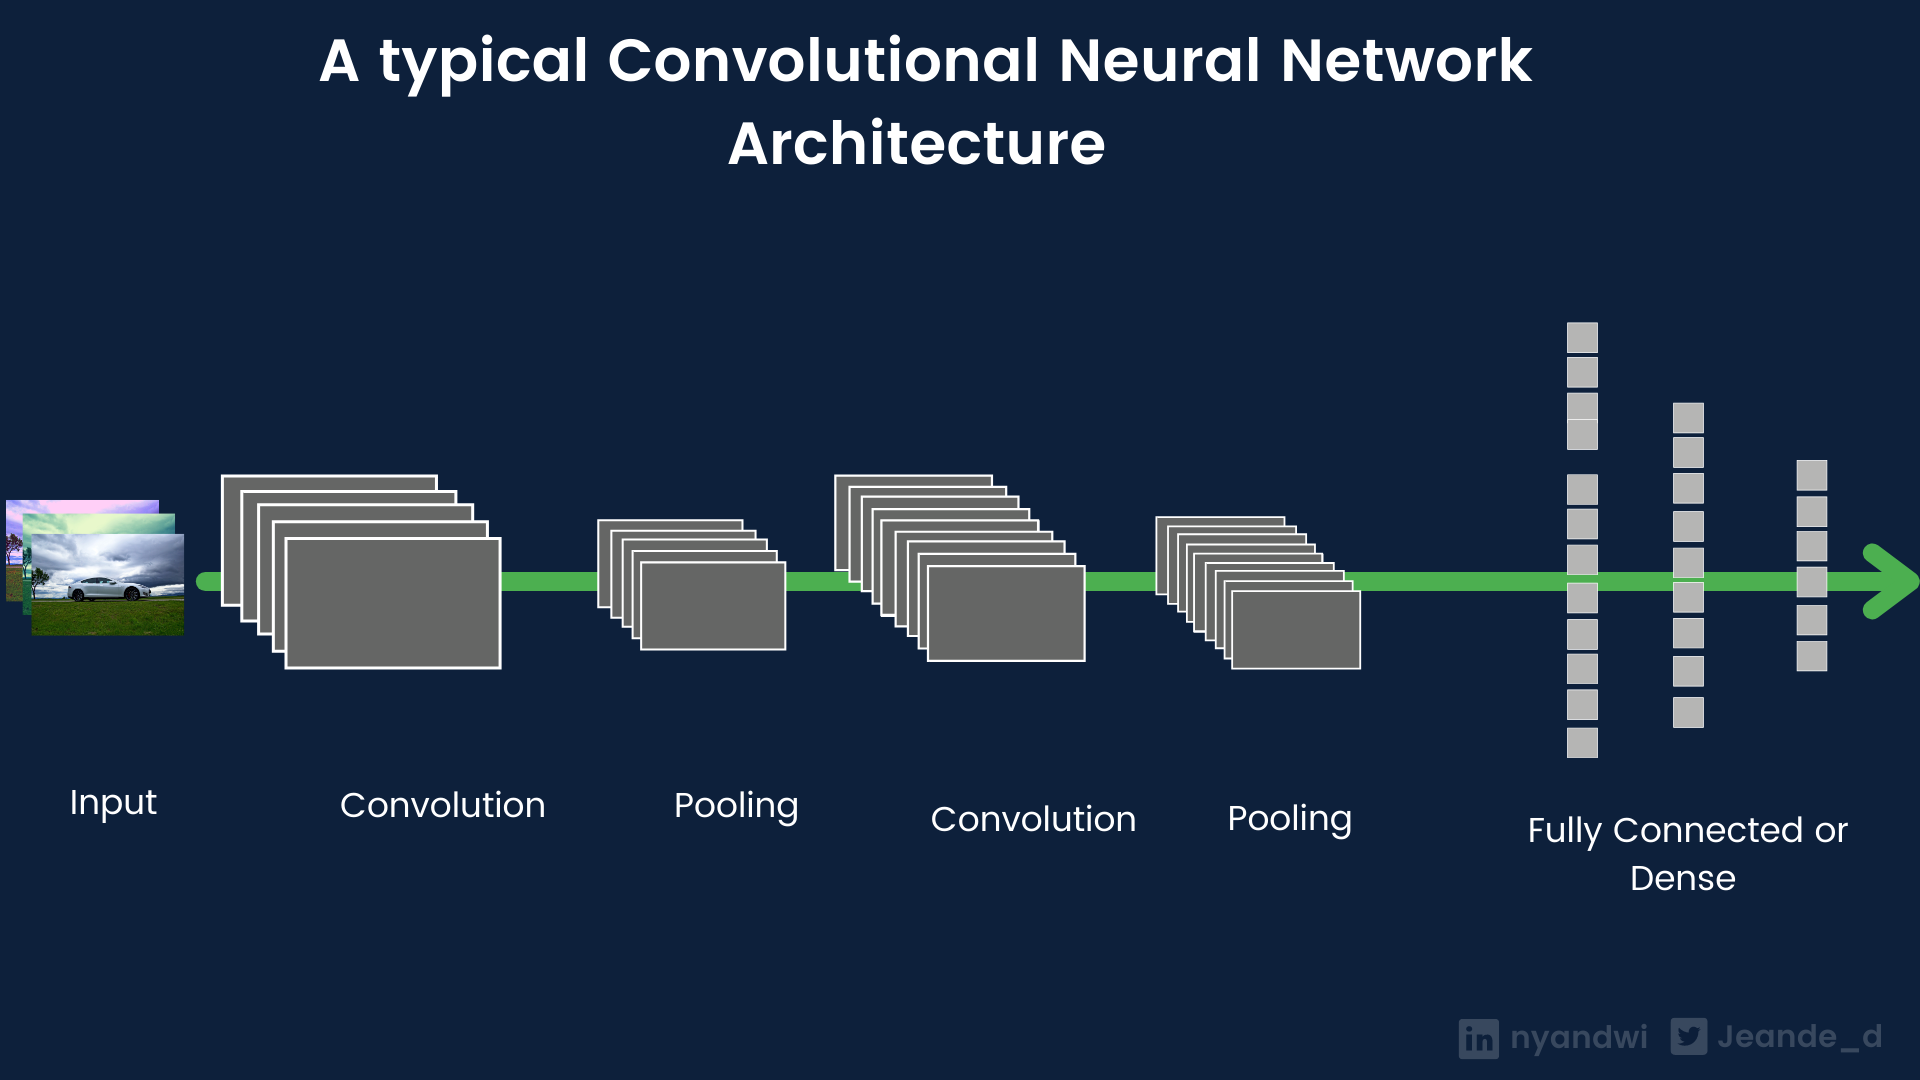


<a name='1-3'></a>

#### ¿Qué es la convolución?

La convolución en el contexto del procesamiento de imágenes es una operación matemática fundamental utilizada para procesar imágenes y extraer características relevantes. Es una técnica que se aplica a una imagen utilizando un **filtro**, **máscara** o **kernel**, que *es una matriz numérica pequeña*.

El proceso de convolución implica deslizar algún **filtro/kernel** sobre la imagen, multiplicando los valores del kernel por los valores de píxeles correspondientes en la imagen y sumándolos. Esta suma se coloca en un nuevo píxel en una imagen de salida llamada mapa de características o imagen convolucionada.

![convolution](https://github.com/goodboychan/goodboychan.github.io/blob/main/_notebooks/image/convolutions.gif?raw=1)

En kernel es una matriz numérica o una máscara que se utiliza en la operación de convolución. El kernel determina cómo se realiza la convolución y qué efecto se aplicará a la imagen.

El kernel es una matriz cuadrada de dimensiones definidas, generalmente de tamaño impar (por ejemplo, 3x3, 5x5, etc.), aunque también pueden utilizarse matrices de tamaño par. Cada elemento del kernel contiene un coeficiente numérico que representa el peso o la contribución de ese píxel en la convolución.

Veamos como afectan algunos kernels a una imagen.

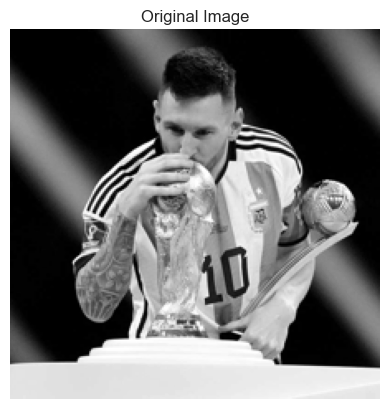

In [12]:
#@title Bajemos una imagen en la variable img en blanco y negro
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Función auxiliar para hacer la comparación entre ambas
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

# Bajamos la imagen, si no andan, podemos probar con la que esta al lado
url = "https://fifpro.org/media/fhmfhvkx/messi-world-cup.jpg"#"https://www.gstatic.com/webp/gallery/1.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Queremos un recorte cuadrado
width, height = img.size
new_size = min(width, height)
left = (width - new_size) // 2
top = (height - new_size) // 2
right = (width + new_size) // 2
bottom = (height + new_size) // 2
img = img.crop((left, top, right, bottom))

# Reducimos la dimension a 224x224
img = img.resize((224 , 224))

# Transformamos a escala de grises
img = img.convert('L')

# Convertimos el objeto de PIL a Numpy para ser compatible con Keras
img = image.img_to_array(img)

# Mostramos la imagen
plt.imshow(img / 255.0, cmap=plt.cm.gray)  # Normalizamos los pixels en [0, 1]
plt.axis('off')
plt.title('Original Image')
plt.show()

In [13]:
import numpy as np

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])
result = np.zeros(img.shape)

# Hacemos efectivamente la convolucion
for ii in range(img.shape[0] - 2):
    print(ii)
    for jj in range(img.shape[1] - 2):
        result[ii, jj] = (img[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
result.shape, result

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221


((224, 224, 1),
 array([[[   0.],
         [   0.],
         [   0.],
         ...,
         [ 439.],
         [   0.],
         [   0.]],
 
        [[   0.],
         [   0.],
         [   0.],
         ...,
         [ 500.],
         [   0.],
         [   0.]],
 
        [[   0.],
         [   0.],
         [   0.],
         ...,
         [ 564.],
         [   0.],
         [   0.]],
 
        ...,
 
        [[3412.],
         [3418.],
         [3420.],
         ...,
         [3447.],
         [   0.],
         [   0.]],
 
        [[   0.],
         [   0.],
         [   0.],
         ...,
         [   0.],
         [   0.],
         [   0.]],
 
        [[   0.],
         [   0.],
         [   0.],
         ...,
         [   0.],
         [   0.],
         [   0.]]]))

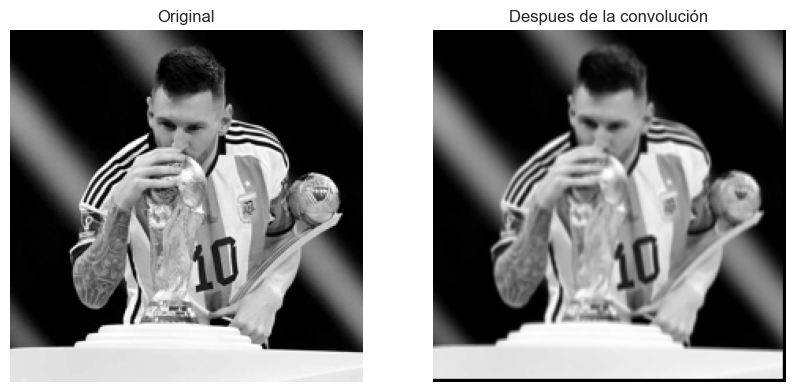

In [14]:
plot_comparison(img, result, 'Despues de la convolución')

Observen que la imagen despues de la convolución tiene un borde negro, ¿por qué creen que es eso?

Definamos ahora una funcion que se llame convolucion que haga lo mismo y vayamos cambiamdo el kernel. Por como definimos la función el kernel siempre es una matriz de 3x3 aunque no tiene porque serlo.

In [15]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+3, jj:jj+3] * kernel)

    return result

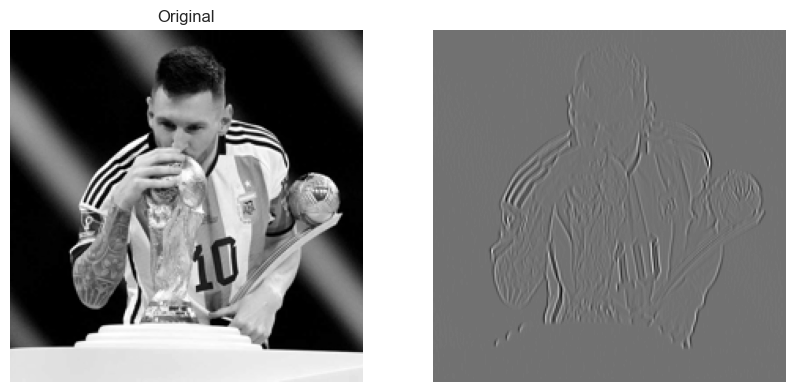

In [16]:
kernel = np.array([[-1, -1, -1],
                   [1, 1, 1],
                   [-1, -1, -1]])
result = convolution(img, kernel)
plot_comparison(img, result, '')

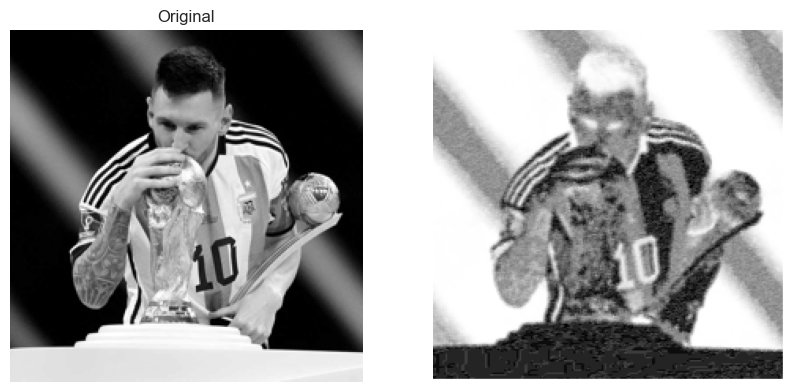

In [17]:
kernel = np.array([[-1, 1, -1],
                   [-1, 1, -1],
                   [-1, 1, -1]])
result = convolution(img, kernel)
plot_comparison(img, result, '')

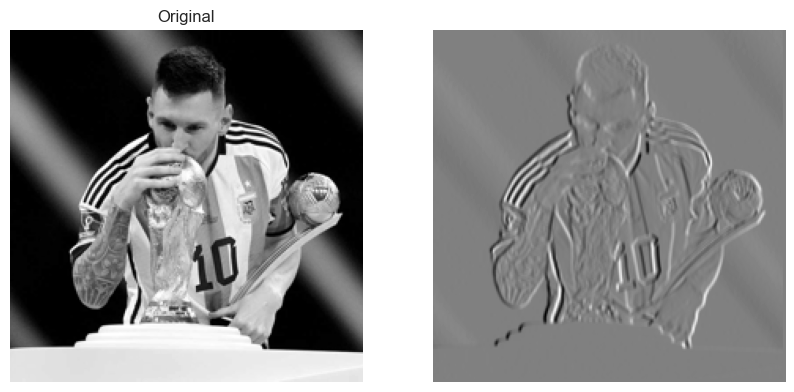

In [19]:
kernel = np.array([[3, 5, 5],
                   [1, -1, 1],
                   [-1, -1, -1]])
result = convolution(img, kernel)
plot_comparison(img, result, '')

<a name='1-4'></a>

#### 1. Capas convolucionales


Las capas de convolución se utilizan para extraer las características de las imágenes mediante filtros. Estos filtros aprenden tanto características de bajo nivel, como líneas o bordes, como características de alto nivel, como la cara, la oreja, la nariz, etc. Las características de alto nivel son las que luego resultan útiles durante el reconocimiento de imágenes.

El proceso de convolución consiste en que pasamos el **filtro** a cada píxel de una imagen, multiplicamos los píxeles correspondientes y luego calculamos la suma, dicha suma hace el nuevo píxel. Repetimos el proceso hasta que el filtro se desliza por todos los píxeles de la imagen.

*La imagen siguiente resume cómo se realiza la operación convolucional*.

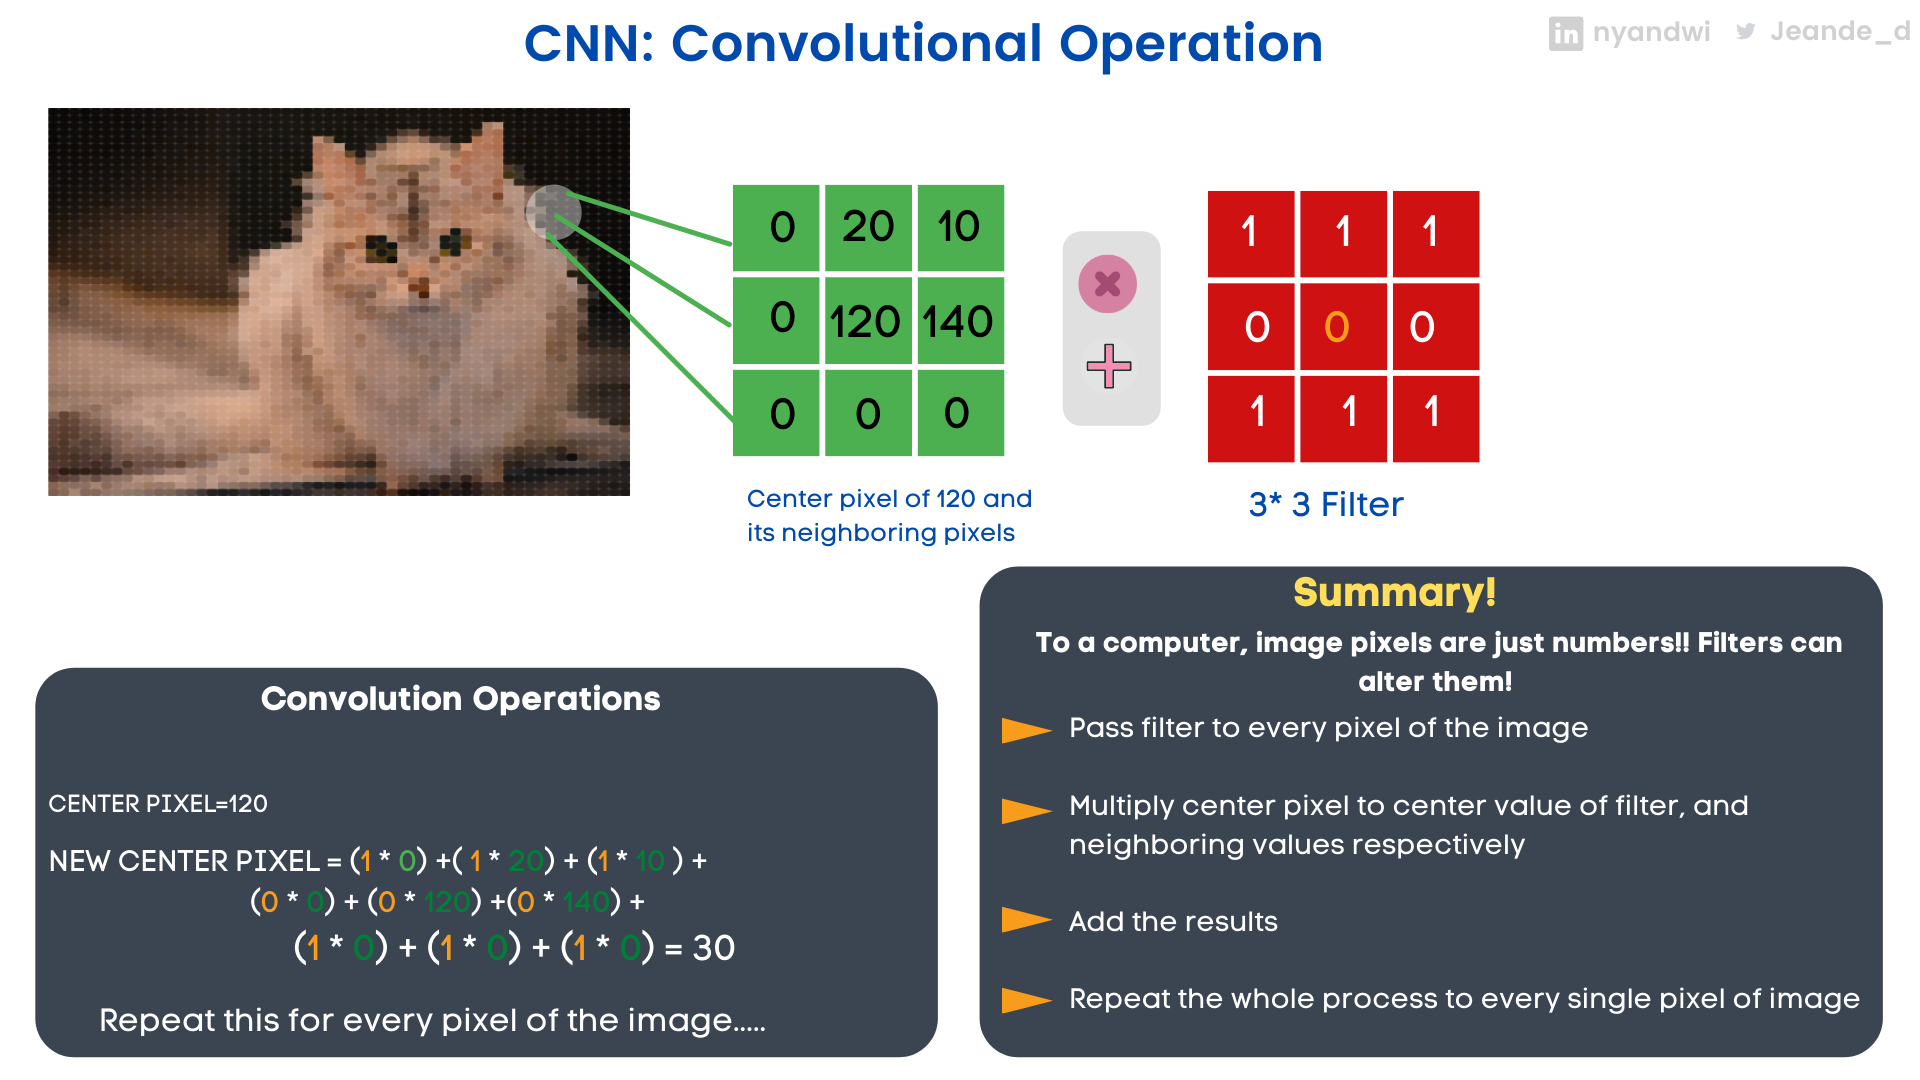

Esta capa se puede agregar usando:

```
tf.keras.layers.Conv2D(.....)
```

La salida de la capa convolucional serán mapas de características de alta dimensión y su dimensión dependerá del número de filtros que tengamos en una capa. Tomemos un ejemplo, si la capa tiene 32 filtros, entonces usted tendrá 32 mapas de características en la salida.

Cuantos más filtros, más mapas de características tendremos y eso no está bien. ¿Cómo podemos reducir las dimensiones de los mapas de características conservando toda la información de la imagen? Esta pregunta me lleva a la agrupación de capas.

**Hiperparámetros de las convoluciones**

Las capas de [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/) tienen varios hiperparametros para definir:

- `kernel_size`: define el tamaño del kernel
- `stride`: determina si el kernel se saltará algunos de los píxeles mientras se desliza por la imagen. Esto afecta al tamaño de la salida porque cuando los pasos son mayores que uno, el kernel se centrará sólo en algunos de los píxeles. Por defecto es 1 en Keras.
- `padding`: permite que una capa convolucional conserve la resolución de la imagen de entrada, se añaden ceros alrededor de los bordes de la imagen de entrada, de modo que el kernel de convolución pueda solaparse con los píxeles del borde de la imagen. Por defecto no se agrega padding en Keras.

Además debemos definir la cantidad de filros que utilizaremos que usaremos. Estos hiperparámetros determinan el tamaño de la salida $O$:

$$ O = ((I - K + 2P) / S) + 1$$

- $I=$ tamaño de la entrada
- $K=$ tamaño del kernel
- $P=$ tamaño del relleno de ceros: *padding*
- $S=$ tamaño del *stride*

<a name='1-5'></a>

#### 2. Capas de pooling

Las capas de **pooling** se utilizan para comprimir o reducir los mapas de características. Existen [varias opciones de pooling](https://keras.io/api/layers/pooling_layers/), pero para preservar la mejor parte de las imágenes se utiliza el Maxpooling. Reduce el tamaño de la imagen conservando los píxeles más altos.

Se implementa usando:

```
tf.keras.layers.MaxPooling2D(...)
```

La salida de las capas de agrupamiento son mapas de características de tamaño reducido. ¿Cómo entiende la red lo que representan estas características?

<a name='1-6'></a>

#### 3. Capas fully-connected

Al final de las CNN, siempre habrá una capa totalmente conectada cuyo trabajo es hacer coincidir los mapas de características producidos a partir de la capa de agrupación con las etiquetas exactas de la imagen original.

Pongamos un ejemplo. Si la imagen de entrada a una capa CNN es un ser humano, las características de alto nivel serán algo así como orejas, narices, ojos, cara, etc. Una vez que la red neuronal ha aprendido eso, estas características tendrán que corresponderse con sus etiquetas. Eso es lo que hacen las capas totalmente conectadas.

Las capas totalmente conectas suelen ser capas densas, activadas con una activación `softmax` o `sigmoid` en función del problema.

```
tf.keras.layers.Dense(....)
```

Una CNN puede tener varios bloques de capas convolucionales y de pooling. El número correcto de estas capas dependerá del alcance del trabajo en cuestión y del tamaño del conjunto de datos.

<a name='1-6bis'></a>

#### 4. Capas adicionales: Normalización

Se suelen agregar capas adicionales de [normalización](https://keras.io/api/layers/normalization_layers/), siendo las más conocidas
[BatchNorm](https://keras.io/api/layers/normalization_layers/batch_normalization/). Se ha demostrado que agregar estas capas luego de cada bloque convolucional mejora la convergencia y los resultados.

    tf.keras.layers.BatchNormalization(...)

---
<a name='2'></a>

## 2 - Clasificación de imágenes: Cifar 10

Vamos a clasificar con CNN un conjunto de datos clásico llamado `cifar10`.

CIFAR-10 consta de 60000 imágenes en color, en 10 clases o categorías, y lo bueno es que el conjunto de datos está bastante equilibrado - cada clase contiene 6000 imágenes. Se asignan 50.000 imágenes para el entrenamiento y 10.000 para la prueba.

Esas 10 clases son: `avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco, camión`.

Puede obtener más información sobre el conjunto de datos [aquí](https://www.cs.toronto.edu/%7Ekriz/cifar.html).

Aunque utilizaremos cifar-10, existe una versión grande de cifar (cifar-100) con 100 clases.

Cifar-10 está disponible en [Keras datasets](https://keras.io/api/datasets/cifar10/) y [TensorFlow datasets](https://www.tensorflow.org/datasets/catalog/cifar10).

<a name='2-1'></a>

### 2.1 Cargar los datos

#### Importar

In [24]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

En Keras, haremos:

In [21]:
(train_data, train_label), (test_data, test_label) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


#### Carga desde catálogo

TensorFlow cuenta con una librería adicional que funciona como un catálogo de conjuntos de datos que se pueden importar fácilmente. Para cargar los datos con TensorFlow se usa `tfds.load(...)`.

* Lo primero que se debe proporcionar al cargar el conjunto de datos, es el nombre de dicho conjunto de datos. Los nombres están bastante claros en [TFDS catalog](https://www.tensorflow.org/datasets/catalog/overview).
* Podemos dividir directamente los datos en entrenamiento y prueba con el argumento `split`. Con `split=['train', 'test[:50%]','test[50%:]']`, se asigna todo el train a los datos de entrenamiento, y el 50% del conjunto de test al conjunto de validación.

* Establecer `as_supervised` a true devolverá una tupla de imagen y etiqueta `(image, label)` en lugar de un diccionario `({'image': img, 'label': label})`.

* `with_info=True` devolverá la información del conjunto de datos en cuestión.

In [27]:
import tensorflow_datasets as tfds
(train_data, val_data, test_data), info = tfds.load('cifar10',
                                          split=['train', 'test[:50%]','test[50%:]'],
                                          as_supervised=True,
                                          shuffle_files=False,
                                          with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\igalk\tensorflow_datasets\cifar10\3.0.2.incompleteVFNOQB\cifar10-train.tfrecord*...:   0%| …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\igalk\tensorflow_datasets\cifar10\3.0.2.incompleteVFNOQB\cifar10-test.tfrecord*...:   0%|  …

Dataset cifar10 downloaded and prepared to C:\Users\igalk\tensorflow_datasets\cifar10\3.0.2. Subsequent calls will reuse this data.


In [28]:
print("Número de imágenes del conjunto de entrenamiento: {}".format(len(train_data)))
print("Número de imágenes del conjunto de validación: {}".format(len(val_data)))
print("Número de imágenes del conjunto de testeo: {}".format(len(test_data)))

Número de imágenes del conjunto de entrenamiento: 50000
Número de imágenes del conjunto de validación: 5000
Número de imágenes del conjunto de testeo: 5000


O utiliza `info` para obtener el número de ejemplos.

In [29]:
info.splits['train'].num_examples

50000

In [30]:
info.splits['test'].num_examples

10000

También los nombres de las clases de `info.features`.

In [ ]:
info.features['label'].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
info.features['label'].num_classes

10

<a name='2-2'></a>

### 2.2 Explorando en imágenes

Siempre es útil explorar las imágenes y ver si hay imágenes que están etiquetadas incorrectamente, o tienen una extensión de `.pdf` cuando en realidad todas las imágenes deberían ser `.png` o `jpg.`.

Obviamente los conjuntos de datos de TensorFlow no tienen errores, pero en la vida real pueden existir etiquetados y formatos incorrectos.

Usemos `tfds.visualization(..)` para visualizar algunas imágenes.

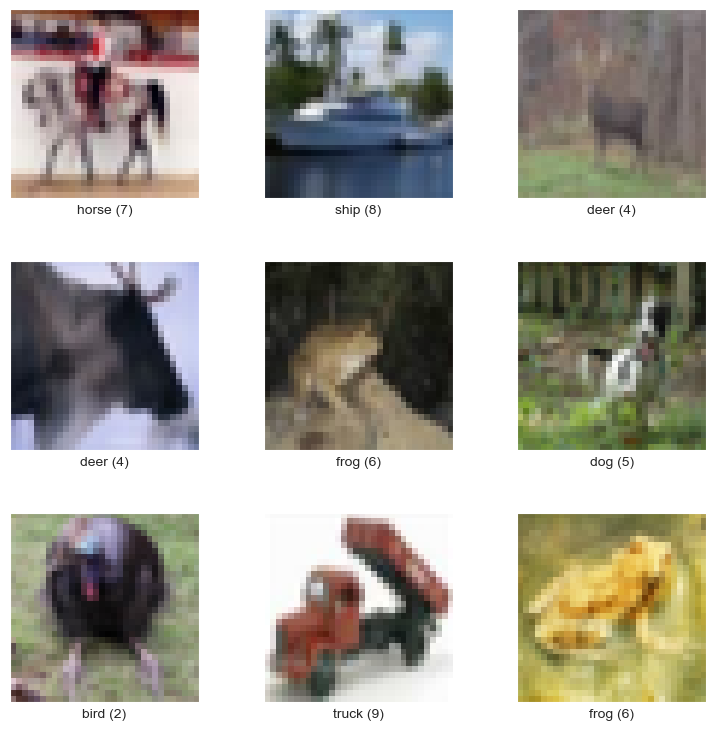

In [31]:
fig = tfds.show_examples(train_data, info)

<a name='2-3'></a>

### 2.3 Preparación de datos: Creación de un proceso de formación

Ahora, vamos a preparar los datos, específicamente, construyendo un canal de entrada.

En primer lugar, el data set de tensorflow es devuelto como `uint8`, necesitamos normalizar las imágenes y al mismo tiempo convertirlas a `float32`.

In [35]:
def preprocess(image, label):
  """
  Toma una imagen y una etiqueta,
  convierte las imágenes a float32, las normaliza entre 0 y 1
  y devuelve la imagen y la etiqueta convertidas.
  """

  normalized_img = tf.cast(image, tf.float32)/255.0

  return normalized_img, label


Ahora, podemos aplicar la función anterior al conjunto de datos utilizando la función `map`. En el proceso, mezclaremos el conjunto de datos y agruparemos las imágenes en lotes.
No mezclaremos el conjunto de prueba.

In [36]:
def train_data_prep(data, shuffle_size, batch_size):

  data = data.map(preprocess)
  data = data.cache()
  data = data.shuffle(shuffle_size).repeat()
  data = data.batch(batch_size)
  data = data.prefetch(1)

  return data

Hagamos lo mismo para el conjunto de test, pero en este caso, no mezclaremos las imágenes

In [37]:
def test_data_prep(data, batch_size):

  data = data.map(preprocess)
  data = data.batch(batch_size)
  data = data.cache()
  data = data.prefetch(1)

  return data

In [38]:
train_data_prepared = train_data_prep(train_data, 1000, 32)

In [39]:
test_data_prepared = test_data_prep(test_data, 32)

El conjunto de validación también se preprocesa de la misma manera que el conjunto de pruebas. Por lo tanto, podemos utilizar la función `test_data_prep` en el conjunto de validación.

In [40]:
val_data_prepared = test_data_prep(val_data, 32)

Ahora, tenemos datos de entrenamiento y de prueba totalmente preparados para alimentar una red convolucional (ConvNets). Pero primero haremos, para despues poder comparar un modelo clásico un MLP!

<a name='2-9'></a>

### 2.4 MLP para Cifar-10

Armaremos un modelo que tenga al menos 4 capas fully-connected. Para eso primero tenemos que formatear un poco como estan los datos.

In [41]:
# Obtener el tamaño de los datos de entrenamiento y validación
train_size = info.splits["train"].num_examples
val_size = len(val_data)

# Preprocesamiento de los datos
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, 10)
    return image, label

batch_size = 32
# Batcheamos los datos
train_data_prepared_mlp = train_data.map(preprocess).batch(batch_size).repeat()
val_data_prepared_mlp = val_data.map(preprocess).batch(batch_size)

# Obtener los pasos por época para el entrenamiento y validación
train_steps = int(train_size / batch_size)
val_steps = int(val_size / batch_size)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Crear el modelo MLP
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(32, 32, 3)))
model_mlp.add(Dense(512, activation='relu'))
model_mlp.add(Dense(256, activation='relu'))
model_mlp.add(Dense(256, activation='relu'))
model_mlp.add(Dense(10, activation='softmax'))

# Compilar el modelo MLP
model_mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,773,066
Trainable params: 1,773,066
Non-trainable params: 0
_________________________________________________________________


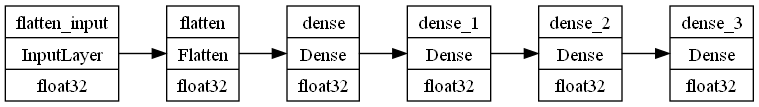

In [44]:
tf.keras.utils.plot_model(model_mlp, rankdir='LR',show_dtype=True)

In [45]:
# Entrenar el modelo MLP

history_mlp = model_mlp.fit(train_data_prepared_mlp,
                            validation_data=val_data_prepared_mlp,
                            epochs=10,
                            steps_per_epoch=train_steps,
                            validation_steps=val_steps)

Epoch 1/10
1562/1562 [==============================] - 27s 17ms/step - loss: 1.8599 - accuracy: 0.3228 - val_loss: 1.7452 - val_accuracy: 0.3650
Epoch 2/10
1562/1562 [==============================] - 27s 17ms/step - loss: 1.6816 - accuracy: 0.3960 - val_loss: 1.6788 - val_accuracy: 0.3976
Epoch 3/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.5940 - accuracy: 0.4262 - val_loss: 1.5611 - val_accuracy: 0.4439
Epoch 4/10
1562/1562 [==============================] - 24s 16ms/step - loss: 1.5365 - accuracy: 0.4446 - val_loss: 1.5570 - val_accuracy: 0.4457
Epoch 5/10
1562/1562 [==============================] - 24s 15ms/step - loss: 1.4942 - accuracy: 0.4628 - val_loss: 1.5573 - val_accuracy: 0.4373
Epoch 6/10
1562/1562 [==============================] - 24s 15ms/step - loss: 1.4545 - accuracy: 0.4755 - val_loss: 1.5091 - val_accuracy: 0.4653
Epoch 7/10
1562/1562 [==============================] - 24s 15ms/step - loss: 1.4268 - accuracy: 0.4887 - val_loss: 1.5090 -

<AxesSubplot:>

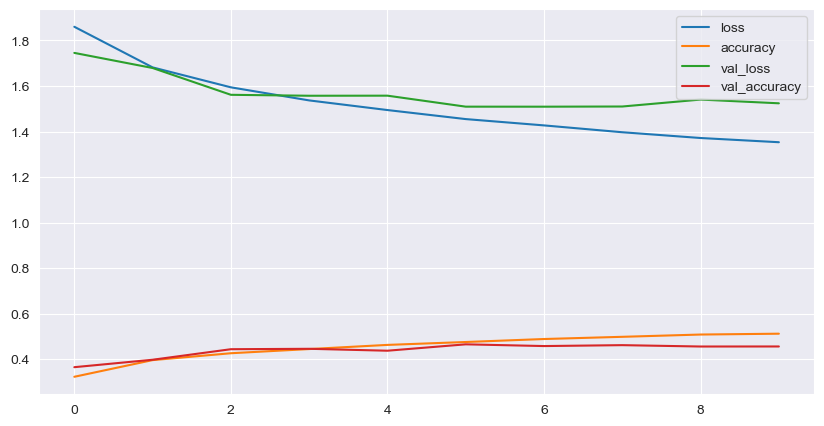

In [54]:
history_mlp_plot = history_mlp.history

# La pasamos a un dataframe
loss_acc_df = pd.DataFrame(history_mlp_plot)

loss_acc_df.plot(figsize=(10,5))

<a name='2-4'></a>

### 2.5 Crear, compilar y entrenar un modelo.

Para recordar lo que vimos al principio, una Red Neuronal Convolucional se compone de 3 capas principales:

* **Capas Convolucionales** para extraer características en la imagen y devolver mapas de características.

A continuación recordemos los argumentos que tiene la capa Convolucional en TensorFlow:

```
* filters: Número de filtros en la capa. Se puede comparar con el número de unidades en capas densas.
* kernel_size: Una tupla de dos enteros que especifican la altura y la anchura de cada filtro. Configurando kernel_size=3, y kernel_size=(3,3), todos son iguales.
* activation: función de activación a utilizar. ¡En la mayoría de los casos, prueba relu!

```
Más información sobre otros argumentos en Conv2D en [keras.io](https://keras.io/api/layers/convolution_layers/convolution2d/).

* **Pooling layers** para reducir/comprimir los mapas de características. Especificamos el tamaño del pooling con el argumento `pool_size`:
    `tf.keras.layers.MaxPooling2D(pool_size=2)`

* Y **Fully Connected Layers** para hacer el resto: emparejar las características comprimidas con sus etiquetas.

En nuestro problema, tenemos 10 clases. Nuestra pérdida es [`sparse_categorical_crossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) y podemos usar el optimizador [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) ya que funciona bien para muchos problemas.

* Entrenar el modelo no es otra cosa que alimentar los datos (imagen y sus etiquetas) al modelo. Especificamos el número de iteraciones que el entrenamiento tiene que ocurrir, y también vamos a asignar `0,15 del conjunto de datos de entrenamiento al conjunto de validación` con `validation_split=0.15`.

Ahora que entendemos todo lo que vamos a hacer, vamos a construir el modelo, compilarlo y entrenarlo.

Una última cosa: cifar-10 imágenes son 32 * 32, y son de color. Así que la forma de entrada es `(32, 32, 3)`. Además, como tenemos 10 clases, las neuronas de salida serán 10, activadas por una función de activación `softmax`.

In [46]:
input_shape = [32,32,3]

cifar_cnn = tf.keras.models.Sequential([
    # Primera capa convolucional: 64 filtros, tamaño de núcleo/filtro (kernel/filter) de 3
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

    # Primera capa de Pooling
    tf.keras.layers.MaxPooling2D(pool_size=2),

    # Segunda capa convolucional & Pooling
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    # Tercera capa convolucional & capa Pooling
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    # Capa de aplanamiento (Flattening layer): Para convertir la salida anterior en un vector de columnas 1D
    tf.keras.layers.Flatten(),


    # Capas totalmente conectadas (fully connected layers)

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),

    # Última capa: 10 neuronas para 10 clases, activadas por softmax
    tf.keras.layers.Dense(units=10, activation='softmax')

])

Ahora que nuestro modelo está creado, podemos ver su arquitectura con `cifar_cnn.summary()`.

In [47]:
# Resumen del modelo

cifar_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 256)       

También podemos graficarlo con `tf.keras.utils.plot_model(...)`.

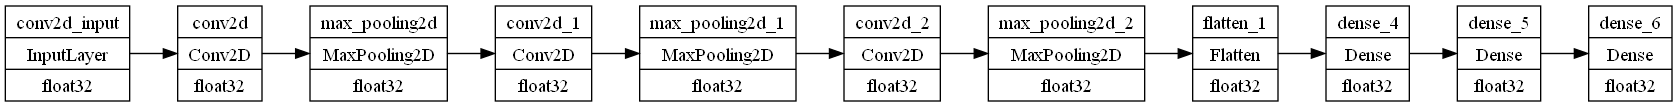

In [48]:
tf.keras.utils.plot_model(cifar_cnn, rankdir='LR',show_dtype=True)

Ya podemos compilar el modelo...

In [49]:
cifar_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

Y aquí entrenamos el modelo. Para un entrenamiento rápido, voy a habilitar la GPU. En Google Colab, la GPU se puede activar yendo a `Runtime` en la barra de menú, ir a `Change runtime`, y en `hardware accelerator`, elegir `GPU`.

Gracias a Colab, podemos entrenar modelos profundos de visión por ordenador más rápido de lo que tardaríamos en hacerlo en máquinas normales.

In [50]:
batch_size = 32
train_size = info.splits["train"].num_examples

val_size = len(val_data_prepared)


train_steps = int(train_size/batch_size)
val_steps = int(val_size/batch_size)

model_history = cifar_cnn.fit(train_data_prepared,
              validation_data=val_data_prepared,
              epochs=10,
              steps_per_epoch=train_steps,
              validation_steps=val_steps)

Epoch 1/10
1562/1562 [==============================] - 56s 35ms/step - loss: 1.5694 - accuracy: 0.4205 - val_loss: 1.2429 - val_accuracy: 0.5781
Epoch 2/10
1562/1562 [==============================] - 56s 36ms/step - loss: 1.1315 - accuracy: 0.5971 - val_loss: 0.9691 - val_accuracy: 0.6719
Epoch 3/10
1562/1562 [==============================] - 58s 37ms/step - loss: 0.9326 - accuracy: 0.6720 - val_loss: 0.9627 - val_accuracy: 0.6484
Epoch 4/10
1562/1562 [==============================] - 60s 38ms/step - loss: 0.8119 - accuracy: 0.7160 - val_loss: 0.9475 - val_accuracy: 0.6641
Epoch 5/10
1562/1562 [==============================] - 58s 37ms/step - loss: 0.7166 - accuracy: 0.7501 - val_loss: 0.9836 - val_accuracy: 0.6797
Epoch 6/10
1562/1562 [==============================] - 60s 39ms/step - loss: 0.6401 - accuracy: 0.7748 - val_loss: 0.9306 - val_accuracy: 0.7109
Epoch 7/10
1562/1562 [==============================] - 55s 35ms/step - loss: 0.5697 - accuracy: 0.7996 - val_loss: 0.9149 -

Ahora que nuestro modelo está entrenado, vamos a visualizar las métricas resultantes: pérdida (loss) y precisión (accuracy) durante el entrenamiento y la validación.

<a name='2-5'></a>

### 2.6 Visualización de los resultados del modelo

<AxesSubplot:>

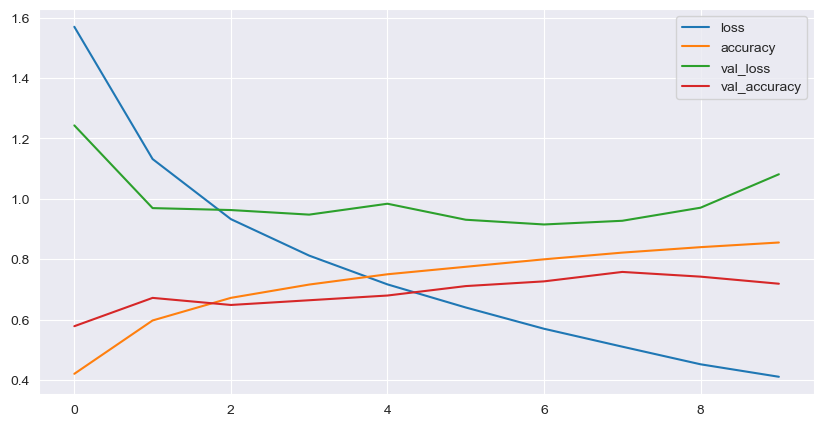

In [51]:
import pandas as pd

 # Extraemos la historia del modelo
model_history = model_history.history

# La pasamos a un dataframe
loss_acc_df = pd.DataFrame(model_history)

loss_acc_df.plot(figsize=(10,5))

Hacemos un grafico visualizando la  precisión y pérdida por separado.

In [52]:
acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = cifar_cnn.history.epoch

# función para graficar la precisión

def plot_acc(acc, val_acc, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.show()

def plot_loss(loss, val_loss, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.legend(loc=0)
  plt.show()

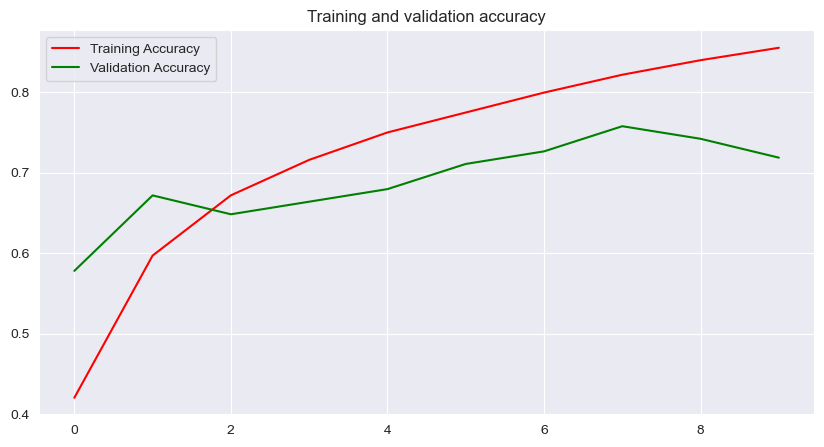

In [53]:
#Graficar acc

plot_acc(acc, val_acc, epochs)

Si observamos el gráfico anterior, parece que el modelo se está sobreajustando.

La sobreadaptación se produce cuando el modelo funciona bien en el conjunto de datos de entrenamiento, pero no puede obtener el mismo rendimiento en los datos de validación.

El sobreajuste puede evitarse añadiendo más datos y regularizando el modelo. En secciones posteriores, añadiremos [capas de reguralización](https://keras.io/api/layers/regularization_layers/) como [Dropout](https://keras.io/api/layers/regularization_layers/dropout/).

La sobreadaptación también puede reducirse deteniendo el entrenamiento antes de tiempo. Esto ocurre cuando se entrena durante muchas épocas, pero en nuestro caso, entrenamos durante 9 épocas. Esto no es un problema aquí, pero si tuviéramos que apostar las épocas, [early stopping](https://keras.io/api/callbacks/early_stopping/) puede ayudar a detener el entrenamiento del modelo cuando no hay mejoras en los resultados.

Vamos a graficar la pérdida.

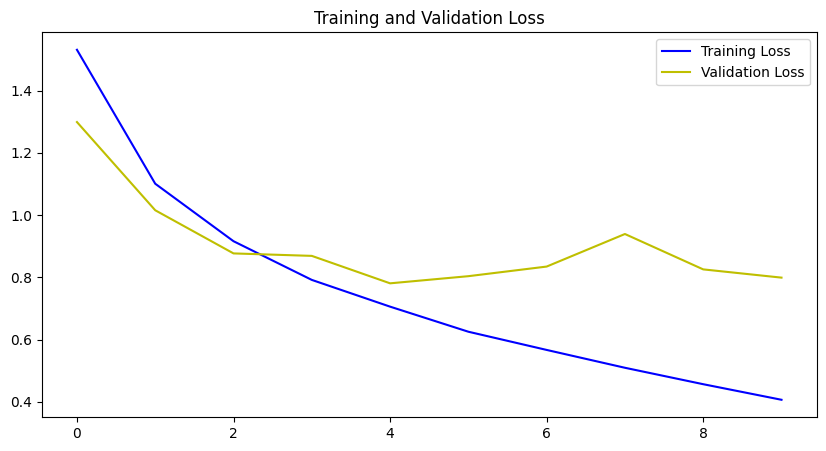

In [ ]:
plot_loss(loss, val_loss, epochs)

La pérdida de entrenamiento siguió disminuyendo como debería, pero la pérdida de validación empezó a divergir en la tercera época.

En la siguiente sección vamos a intentar mejorar el modelo.

<a name='2-6'></a>

### 2.7 Mejorar el modelo

Vamos a hacer dos cosas para mejorar el modelo.

En primer lugar, voy a aumentar las imágenes de validación. Actualmente, son 5000, es el 10% del conjunto de entrenamiento. Voy a duplicarlo.

Otra cosa a intentar es ajustar las capas del modelo. Uno usaría herramientas como [Keras Tuner](https://keras.io/keras_tuner/) para buscar el número óptimo de filtros, etc, pero por ahora, vamos a añadir la capa dropout.

La idea de [dropout](https://keras.io/api/layers/regularization_layers/dropout/) es muy simple: Durante el entrenamiento, en cada iteración, se desactiva aleatoriamente un número determinado de neuronas. Esto puede aumentar tanto el rendimiento como la generalización de la red neuronal. Más información sobre este arte [aquí](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/).

In [55]:
# recargar los datos

# Conjunto de entrenamiento = 80% del conjunto de entrenamiento original (50.000 imágenes)
# Conjunto de validación = 20% del conjunto de entrenamiento = 10.000 imágenes
# Conjunto de prueba = conjunto de prueba original completo = 10.000 imágenes

(train_data, val_data, test_data), info = tfds.load('cifar10',
                                          split=['train[:80%]', 'train[80%:]','test'],
                                          as_supervised=True,
                                          shuffle_files=True,
                                          with_info=True
)

Vamos a preprocesar estos 3 conjuntos con las funciones que definimos al principio.

In [56]:
train_final = train_data_prep(train_data, 1000, 32)

val_final = test_data_prep(val_data, 32)
test_final = test_data_prep(test_data, 32)

Ahora, podemos redefinir el modelo.

In [57]:
input_shape = [32,32,3]

cifar_cnn_2 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same',  activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=10, activation='softmax')

])

cifar_cnn_2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics='accuracy')

In [58]:
# Training the model for 10 epochs

batch_size = 32
train_size = 40000
val_size = 10000


train_steps = int(train_size/batch_size)
val_steps = int(val_size/batch_size)

model_history_2 = cifar_cnn_2.fit(train_final,
              validation_data=val_final,
              epochs=10,
              steps_per_epoch=train_steps,
              validation_steps=val_steps)

Epoch 1/10
1250/1250 [==============================] - 73s 57ms/step - loss: 1.6642 - accuracy: 0.3851 - val_loss: 1.3588 - val_accuracy: 0.5118
Epoch 2/10
1250/1250 [==============================] - 73s 59ms/step - loss: 1.2887 - accuracy: 0.5386 - val_loss: 1.0436 - val_accuracy: 0.6340
Epoch 3/10
1250/1250 [==============================] - 73s 58ms/step - loss: 1.1281 - accuracy: 0.6031 - val_loss: 1.0940 - val_accuracy: 0.6262
Epoch 4/10
1250/1250 [==============================] - 71s 57ms/step - loss: 1.0191 - accuracy: 0.6441 - val_loss: 0.8497 - val_accuracy: 0.7066
Epoch 5/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.9471 - accuracy: 0.6686 - val_loss: 0.8093 - val_accuracy: 0.7166
Epoch 6/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.8950 - accuracy: 0.6872 - val_loss: 0.8138 - val_accuracy: 0.7161
Epoch 7/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.8509 - accuracy: 0.7051 - val_loss: 0.7737 -

Parece que la diferencia entre val y la precisión de entrenamiento no es tan alta como antes.
Vamos a trazar la pérdida y la precisión.

In [ ]:
model_history = model_history_2.history

acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = model_history_2.epoch

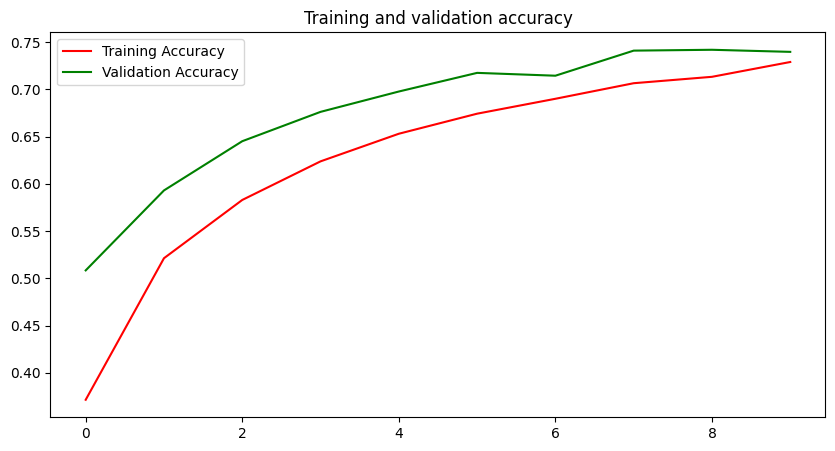

In [ ]:
# Plot accuracy

plot_acc(acc, val_acc, epochs)

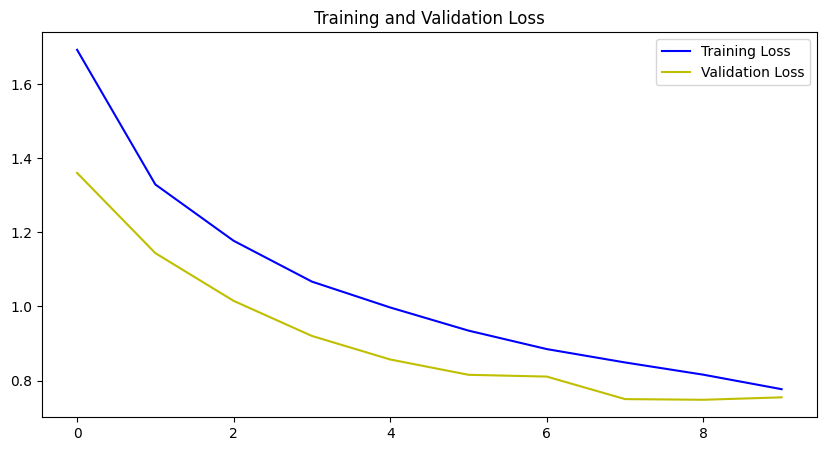

In [ ]:
# Plot loss

plot_loss(loss, val_loss, epochs)

Esto es mucho mejor. Sólo entrenamos durante 10 épocas y parece que la pérdida seguía disminuyendo.

Es notablemente que Dropout es una de las poderosas técnicas de regularización.

Challenge a continuacion:

Sólo se ha utilizado dropout para evitar overfitting. ¿Qué más se puede hacer para evitar el sobreajuste? ¿Aumentar los datos?

<a name='2-7'></a>

### 2.8 Evaluación en el set de testeo

In [59]:
# Evaluación de un modelo en un conjunto de pruebas

loss, acc = cifar_cnn_2.evaluate(test_final)

313/313 [==============================] - 5s 15ms/step - loss: 0.7350 - accuracy: 0.7463


In [60]:
# Imprimir pérdida y acc con 3 únicos decimales

print('Test Loss: {:.3f}'.format(loss))
print('Test Accuracy: {:.3f}'.format(acc))

Test Loss: 0.735
Test Accuracy: 0.746


El conjunto de pruebas es un dato nuevo para el modelo, pero como se puede ver, la precisión no es realmente mala, dado que la precisión de entrenamiento es del 76%.

<a name='2-9'></a>

### 2.8 Guardar y cargar el modelo para la predicción

In [61]:
# Guardar el modelo - extension h5

cifar_cnn_2.save('Cifar_Best.h5')

In [62]:
# cargar un modelo guardado

from keras.models import load_model

load_cifar = load_model('Cifar_Best.h5')

In [63]:
load_cifar.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256)       

Este es el final del laboratorio. Hemos aprendido mucho, desde la introducción a CNN y lo que están hechos de, a la práctica en un conjunto de datos del mundo real.

También hemos aprendido a utilizar los conjuntos de datos de TensorFlow. Hay muchos más conjuntos de datos de código abierto con los que puedes practicar para desarrollar más intuición sobre el aprendizaje automático.

Para seguir aprendiendo, consulta los siguientes cursos.

<a name='3'></a>

## 3 - Aprendizajes futuros

Los siguientes son los cursos más recomendados para aprender más sobre los fundamentos del aprendizaje automático y la visión computacional

* [Google Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course) para fundamentos de Machine Learning

* [Intro to Deep Learning MIT (Lecture 1 and 3)](http://introtodeeplearning.com) para fundamentos rápidos de Deep Learning y Deep Computer Vision

* [Especialización en Aprendizaje Profundo, Andrew Ng](https://www.deeplearning.ai/program/deep-learning-specialization/). Este es un gran curso para profundizar en los fundamentos del Aprendizaje Profundo. [Gratis en YouTube](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF).

* [Fast.AI Practical Deep Learning for Coders](https://course.fast.ai). Este es el mejor curso de su clase (muy práctico y tiene una alta valoración de la comunidad).